In [5]:
# This is the classification practice using wine dataset
# based on sklearn
# please download mlwpy.py file
import pandas as pd

from mlwpy import *
%matplotlib inline

In [6]:
# 와인데이터 불러오기
wine = datasets.load_wine()

# pandas 데이터프레임에 와인 데이터를 넣어 테이블로 시각화하기
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
display(pd.concat([wine_df.head(3), wine_df.tail(3)]))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.2300,1.7100,2.4300,15.6000,127.0000,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,"1,065.0000",0
1,13.2000,1.7800,2.1400,11.2000,100.0000,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,"1,050.0000",0
2,13.1600,2.3600,2.6700,18.6000,101.0000,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,"1,185.0000",0
175,13.2700,4.2800,2.2600,20.0000,120.0000,1.5900,0.6900,0.4300,1.3500,10.2000,0.5900,1.5600,835.0000,2
176,13.1700,2.5900,2.3700,20.0000,120.0000,1.6500,0.6800,0.5300,1.4600,9.3000,0.6000,1.6200,840.0000,2
177,14.1300,4.1000,2.7400,24.5000,96.0000,2.0500,0.7600,0.5600,1.3500,9.2000,0.6100,1.6000,560.0000,2


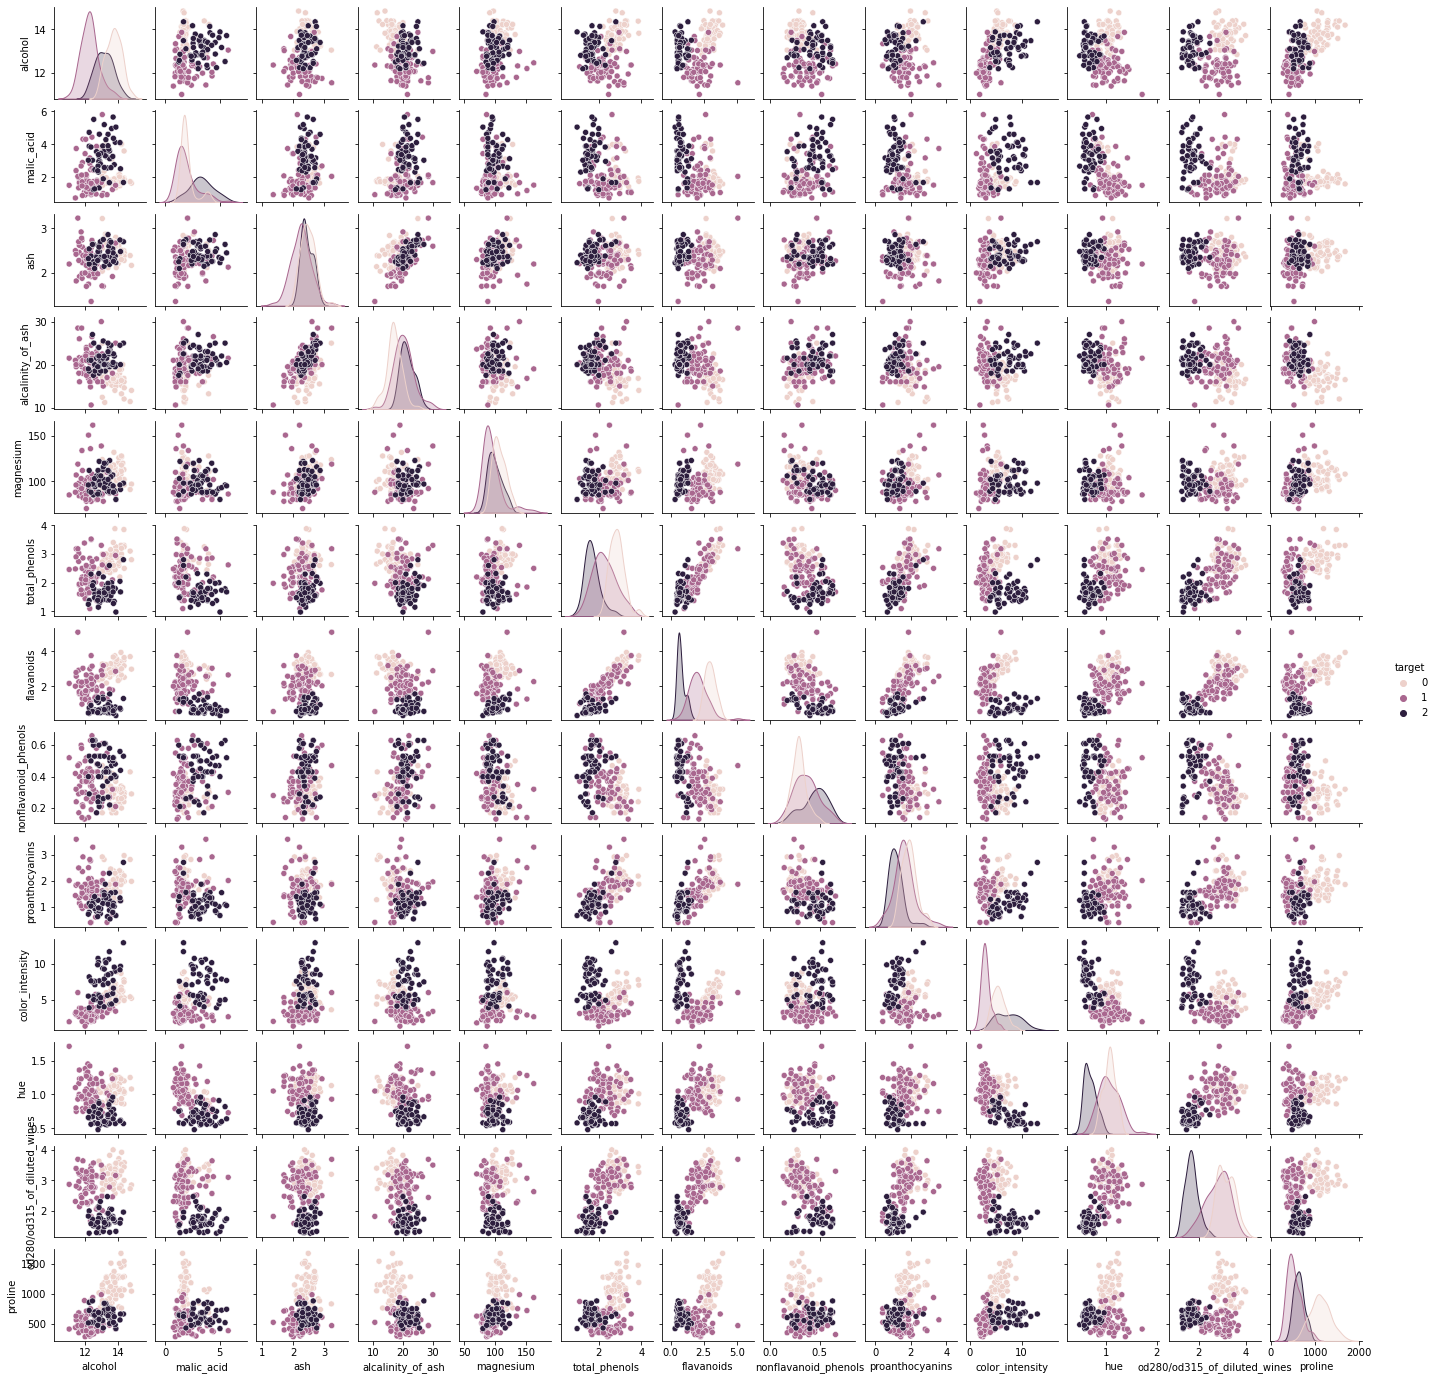

In [7]:
# 특성과 타깃 클래스가 가진 분포를 그래프로 시각화합니다.
sns.pairplot(wine_df, hue='target', height=1.5)

In [9]:
# 타깃 클래스를 출력합니다.
print('targets: {}'.format(wine.target_names))

targets: ['class_0' 'class_1' 'class_2']


In [10]:
# 간단하게 훈련 데이터와 테스트 데이터를 분리합니다.

(wine_train_ftrs, wine_test_ftrs,
 wine_train_tgt, wine_test_tgt) = skms.train_test_split(wine.data,
                                                        wine.target,
                                                        test_size=0.25)

# 분리한 훈련 데이터와 테스트 데이터의 특성 형태를 출력합니다.
print("Train features shape :", wine_train_ftrs.shape)
print("Test features shape :", wine_test_ftrs.shape)

Train features shape : (133, 13)
Test features shape : (45, 13)


In [17]:
# K-nn 모델을 이용한 학습
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
fit = knn.fit(wine_train_ftrs, wine_train_tgt)
preds = fit.predict(wine_test_ftrs)

# 예측 결과를 따로 분리해 둔 테스트 타깃으로 평가합니다.
print("3NN accuracy:",
      metrics.accuracy_score(wine_test_tgt, preds))

3NN accuracy: 0.7555555555555555


In [18]:
# 나이브-베이즈 모델을 이용한 학습
nb = naive_bayes.GaussianNB()
fit = nb.fit(wine_train_ftrs, wine_train_tgt)
preds = fit.predict(wine_test_ftrs)

print("NB accuracy :",
      metrics.accuracy_score(wine_test_tgt, preds))

NB accuracy : 1.0
